# Задание на работу

Справочный материал:

Основы_Python_7_классы.pdf

ML_4_2_реализация_обучения_персептрона.pdf

ML_4_3_ирисы_Фишера.pdf

ML_4_4_тренировка_персептрона.pdf

ML_4_5_ADALINE.pdf

ML_4_6_реализация_ADALINE.pdf

ML_4_7_тренировка_ADALINE.pdf

ML_4_8_ADALINE_стохастический_градиентный_спуск.pdf

1. Используя рассмотренный в ML_4_2_реализация_обучения_персептрона.pdf класс Perceptron в
качестве базового класса, разработать дочерний класс AdalineGD, реализующий модель адаптивного линейного
нейрона. Конструктор класса должен принимать аргумент, осуществляющий переключение между пакетным и
стохастическим градиентным спуском.
2. Загрузить набор данных цветков ириса из модуля datasets библиотеки scikit-learn. Сформировать
обучающую выборку, включающую результаты измерений длины чашелистика (sepal length) и длины лепестка (petal
length) для ириса щетинистого (lris setosa) и ириса разноцветного (Iris versicolor).
Отобразить на графике расположение данных в пространстве признаков.
3. Создать модель персептрона базового класса и обучить её на имеющихся данных при использовании скорости
обучения eta=0.01 и длительности обучения n_iter=10. Построить график изменения количества ошибочных
классификаций в процессе обучения. Построить график области решений при помощи функции
plot_decision_regions(), разработанной ранее на практических занятиях.
4. Создать модель ADALINE, использующую для обучения пакетный градиентный спуск, и обучить её при
значениях гиперпараметров длительности и скорости обучения n_iter=50, eta=0.0001. Построить график области
решений при помощи функции plot_decision_regions().
Обучить созданную модель при значениях гиперпараметров n_iter=10, eta=0.01, а также n_iter=10,
eta=0.0001. Построить графики изменения среднеквадратической ошибки в процессе обучения. Пояснить, почему в
одном случае модель успешно обучается, а в другом случае ошибка возрастает с каждой итерацией.
5. Создать модель ADALINE, использующую для обучения стохастический градиентный спуск, и обучить её при
значениях гиперпараметров n_iter=15, eta=0.01. Построить графики изменения среднеквадратической ошибки в
процессе обучения, а также график области решений при помощи функции plot_decision_regions().
6. Сделать выводы по проделанной работе.

In [47]:
# Импотр библиотек
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time

# Задание 1

Используя рассмотренный в ML_4_2_реализация_обучения_персептрона.pdf класс Perceptron в качестве базового класса, разработать дочерний класс AdalineGD, реализующий модель адаптивного линейного нейрона. Конструктор класса должен принимать аргумент, осуществляющий переключение между пакетным и стохастическим градиентным спуском.

In [48]:
class Perceptron():
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def netInput(self, x):
        return np.dot(x,  self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return np.where(self.netInput(x) >= 0.0, 1, -1)

    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

In [49]:
class AdalineGD(Perceptron):
    def __init__(self, eta=0.1, n_iter=10, type_grad_descent='Batch'):
        self.type_grad_descent = type_grad_descent
        self.eta = eta
        self.n_iter = n_iter

    def netInput(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def activation(self, x):
        return self.netInput(x)

    def predict(self, x):
        return np.where(self.netInput(x)>=0.0,1,-1)

    def updateWeights(self, xi, target):
        output = self.netInput(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = (error**2).sum() / 2.0
        return cost

    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []

        if self.type_grad_descent == 'Stochastic':
            for _ in range(self.n_iter):
                errors = []
                for xi, target in zip(x, y):
                    errors.append(self.updateWeights(xi, target))
                avg_errors = sum(errors)/len(y)
                self.errors_.append(avg_errors)

        elif self.type_grad_descent == 'Batch':
            for _ in range(self.n_iter):
                output = self.netInput(x)
                errors = y - output
                self.w_[1:] += self.eta * x.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()
                cost = (errors**2).sum() / 2.0
                self.errors_.append(cost)

        else:
            print(f'''Такого типа просчета градиентного спуска как
                    {self.type_grad_descent} не реализовано''')


        return self

# Задание 2

Загрузить набор данных цветков ириса из модуля datasets библиотеки scikit-learn. Сформировать обучающую выборку, включающую результаты измерений длины чашелистика (sepal length) и длины лепестка (petal length) для ириса щетинистого (lris setosa) и ириса разноцветного (Iris versicolor). Отобразить на графике расположение данных в пространстве признаков.

In [50]:
iris_dataset = load_iris()

In [51]:
x = iris_dataset['data'][0:100,[0, 2]]
y = iris_dataset['target'][0:100]
y = np.where(y==0, -1, 1)

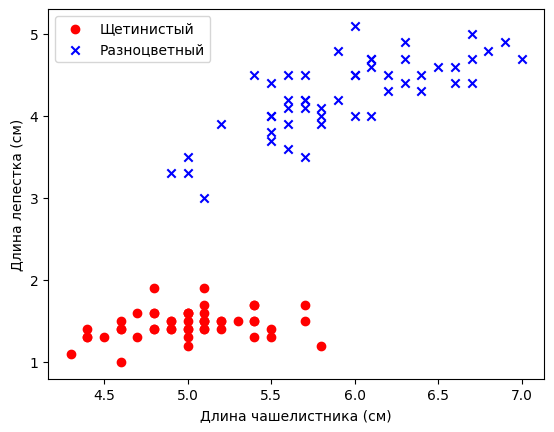

In [52]:
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Щетинистый')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='Разноцветный')
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
plt.legend()
plt.show()

# Задание 3

Создать модель персептрона базового класса и обучить её на имеющихся данных при использовании скорости обучения eta=0.01 и длительности обучения n_iter=10. Построить график изменения количества ошибочных классификаций в процессе обучения. Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [53]:
perceptron = Perceptron(eta=0.01, n_iter=10)

In [54]:
perceptron.fit(x, y)

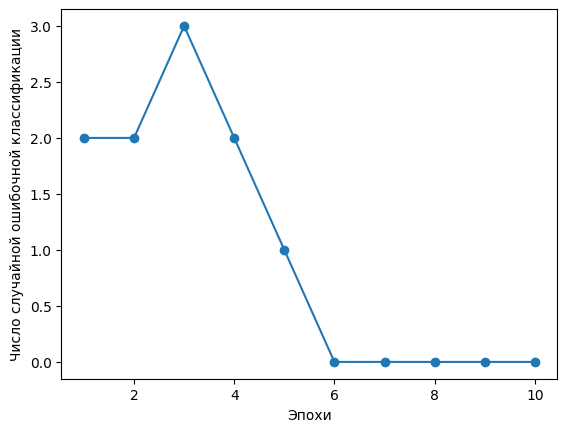

In [55]:
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случайной ошибочной классификации')
plt.show()

In [56]:
def plotDecisionRegions(x, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)

<ipython-input-56-26bcc1e653ca>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


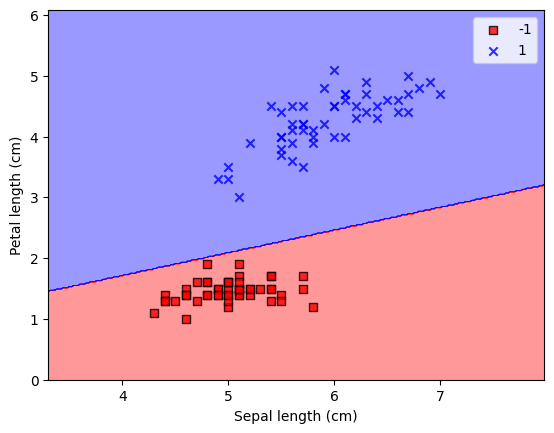

In [57]:
plotDecisionRegions(x, y, perceptron)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

# Задание 4

Создать модель ADALINE, использующую для обучения пакетный градиентный спуск, и обучить её при значениях гиперпараметров длительности и скорости обучения n_iter=50, eta=0.0001. Построить график области решений при помощи функции plot_decision_regions(). Обучить созданную модель при значениях гиперпараметров n_iter=10, eta=0.01, а также n_iter=10, eta=0.0001. Построить графики изменения среднеквадратической ошибки в процессе обучения. Пояснить, почему в одном случае модель успешно обучается, а в другом случае ошибка возрастает с каждой итерацией.

In [58]:
adaline_batch_1 = AdalineGD(eta=0.0001, n_iter=50, type_grad_descent='Batch')

In [59]:
adaline_batch_1.fit(x, y)

<ipython-input-56-26bcc1e653ca>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


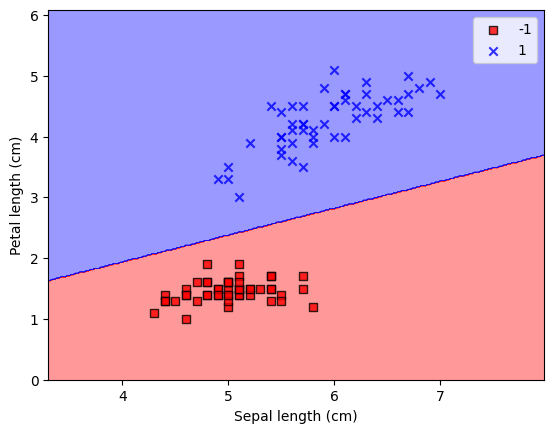

In [60]:
plotDecisionRegions(x, y, adaline_batch_1)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

<ipython-input-56-26bcc1e653ca>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


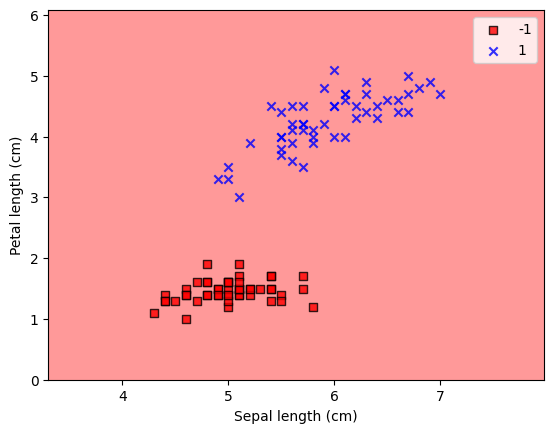

In [61]:
adaline_batch_2 = AdalineGD(eta=0.01, n_iter=10, type_grad_descent='Batch')
adaline_batch_2.fit(x, y)
plotDecisionRegions(x, y, adaline_batch_2)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

<ipython-input-56-26bcc1e653ca>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


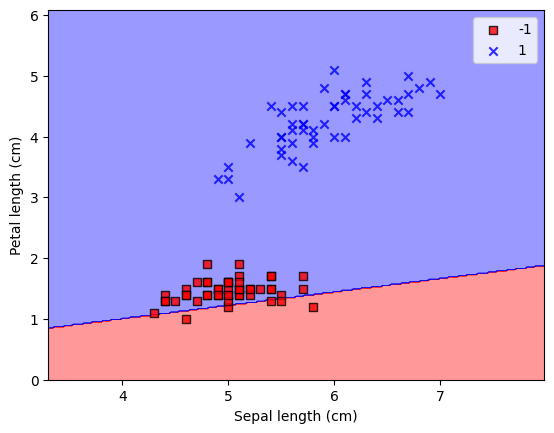

In [62]:
adaline_batch_3 = AdalineGD(eta=0.0001, n_iter=10, type_grad_descent='Batch')
adaline_batch_3.fit(x, y)
plotDecisionRegions(x, y, adaline_batch_3)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

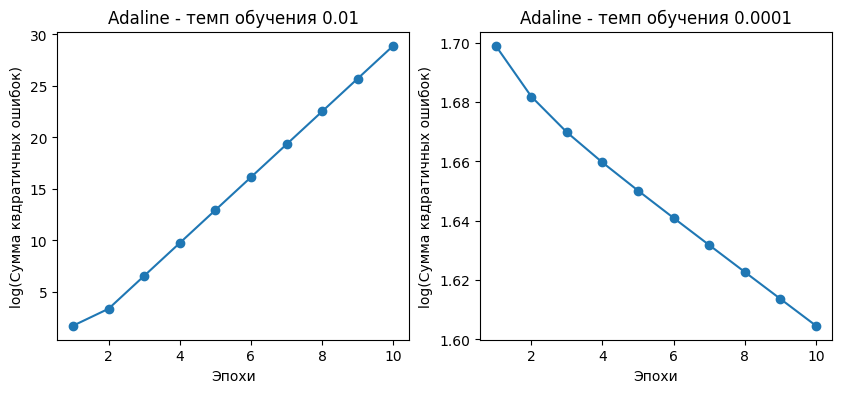

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].plot(range(1, len(adaline_batch_2.errors_)+1), np.log10(adaline_batch_2.errors_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма квдратичных ошибок)')
ax[0].set_title('Adaline - темп обучения 0.01')

ax[1].plot(range(1, len(adaline_batch_3.errors_)+1), np.log10(adaline_batch_3.errors_), marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(Сумма квдратичных ошибок)')
ax[1].set_title('Adaline - темп обучения 0.0001')

plt.show()

Задача линейного адаптивного нейрона - попасть в точку глобального минимума системы. При выполнении данной задачи изменяется вес adaline. Величина, на которую после каждой итерации изменяется вес нейрона, зависит от параметра n (эта) - темп обучения. Соответственно, при его большом значении в 0.01 - линейный адаптивный нейрон постоянно промахивается мимо глобального минимума. При меньшем значении темпа обучения, линейный адаптивный нерон не промахивается мимо глобального минимума и обучение проходит успешно

# Задание 5

Создать модель ADALINE, использующую для обучения стохастический градиентный спуск, и обучить её при значениях гиперпараметров n_iter=15, eta=0.01. Построить графики изменения среднеквадратической ошибки в процессе обучения, а также график области решений при помощи функции plot_decision_regions().

In [64]:
adaline_stochastic = AdalineGD(eta=0.01, n_iter=15, type_grad_descent='Stochastic')

In [65]:
adaline_stochastic.fit(x, y)

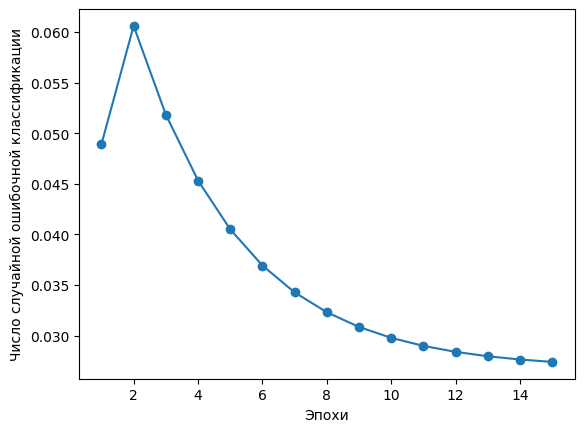

In [66]:
plt.plot(range(1, len(adaline_stochastic.errors_)+1), adaline_stochastic.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случайной ошибочной классификации')
plt.show()

<ipython-input-56-26bcc1e653ca>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


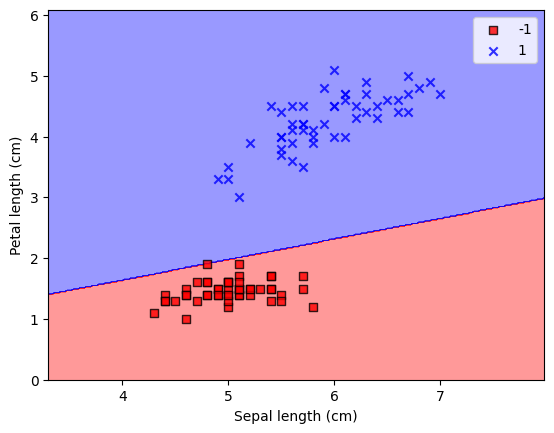

In [67]:
plotDecisionRegions(x, y, adaline_stochastic)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

# Выводы

В ходе работы был изучен классический перцептрон и линейный адаптивный нейрон. На основе данных по ирисам были обучены нейрон и перцептрон несколько раз с различными параметрами. Линейный алаптивный нейрон был обучен с различными параметрами шага обучения и на различном количевте итераций.

В ходе работы было выяснено, что в зависимости от параметра "эта", качество обучения изменяется: при сильно высоком значении параметра, adaline может не найти глобальный минимум и ошибка будет увеличиваться.

Также, были исследованы два способа расчета градиентного спуска: пакетный и стохастический. Оба варианта расчета ошибки приводят к правильной классификации.

# Задание 6

Замерьте время обучения при минимальном и максимальном значении "Эта"? (%% Time) как сильно оно зависит от данного параметра.

In [72]:
perceptron_max = Perceptron(eta=1.0, n_iter=100)
perceptron_min = Perceptron(eta=0.0, n_iter=100)

times_max = []
times_min = []

for i in range(100):
    cur_time = time.time()
    perceptron_max.fit(x, y)
    times_max.append(time.time()-cur_time)

    cur_time = time.time()
    perceptron_min.fit(x, y)
    times_min.append(time.time()-cur_time)

print(f'Среднее время вычислений при параметре "эта"=1.0: {np.mean(times_max)}')
print(f'Среднее время вычислений при параметре "эта"=0.0: {np.mean(times_min)}')

Среднее время вычислений при параметре "эта"=1.0: 0.1659093689918518
Среднее время вычислений при параметре "эта"=0.0: 0.16330843210220336
